# MLP Cifar 10

Hier werden das erste Mal im CIFAR10 nun Algorithmen aus dem Multilayer Perceptron (MLP) für multi-class Klassifikation verwendet:


In [2]:
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json
from tensorflow.python.keras.datasets import cifar10
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

In [4]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
# the data, split between train and test sets
print((train_X.shape))
print((train_y.shape))
print((test_X.shape))
print((test_y.shape))
print()
train_X = train_X.reshape(50000,32*32*3)
test_X = test_X.reshape(10000,32*32*3)
print((train_X.shape))
print((train_y.shape))
print((test_X.shape))
print((test_y.shape))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255 # skalieren
test_X /= 255 # Skalieren
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')


train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

50000 train samples
10000 test samples


In [7]:
# Prüfen ob bereits ein Model bereits trainiert und gespeichert ist, im Falle, dass noch kein Modell vorliegt neu erstellen
modelMLP = Path("./MODEL/modelMLP.json")
if modelMLP.is_file():
   # load json and create model
    json_file = open('./MODEL/modelMLP.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    modelMLP = model_from_json(loaded_model_json)
    # load weights into new model
    modelMLP.load_weights("./MODEL/modelMLP.h5")
    print("Loaded model from disk")
else:
    modelMLP = Sequential()
    modelMLP.add(Dense(512, activation='relu', input_shape=(3072,)))
    modelMLP.add(Dropout(0.2))
    modelMLP.add(Dense(512, activation='relu'))
    modelMLP.add(Dropout(0.2))
    modelMLP.add(Dense(num_classes, activation='softmax'))
    modelMLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [8]:
modelMLP.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
history = modelMLP.fit(train_X, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_X, test_y))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 46s 917us/step - loss: 2.1385 - accuracy: 0.2497 - val_loss: 1.8842 - val_accuracy: 0.3176
Epoch 2/50
50000/50000 [==============================] - 45s 910us/step - loss: 1.8568 - accuracy: 0.3291 - val_loss: 1.7363 - val_accuracy: 0.3757
Epoch 3/50
50000/50000 [==============================] - 45s 907us/step - loss: 1.7789 - accuracy: 0.3607 - val_loss: 1.7258 - val_accuracy: 0.3744
Epoch 4/50
50000/50000 [==============================] - 46s 928us/step - loss: 1.7268 - accuracy: 0.3824 - val_loss: 1.6930 - val_accuracy: 0.3976
Epoch 5/50
50000/50000 [==============================] - 48s 952us/step - loss: 1.6897 - accuracy: 0.3952 - val_loss: 1.7451 - val_accuracy: 0.3573
Epoch 6/50
50000/50000 [==============================] - 46s 924us/step - loss: 1.6623 - accuracy: 0.4053 - val_loss: 1.5635 - val_accuracy: 0.4423
Epoch 7/50
50000/50000 [==============================]

In [10]:
# Save trained Model to disk via JSON
model_json = modelMLP.to_json()
with open("./MODEL/modelMLP.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelMLP.save_weights("./MODEL/modelMLP.h5")
print("Saved modelMLP to disk")

Saved modelMLP to disk


In [11]:
score = modelMLP.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.501966787147522
Test accuracy: 0.4900999963283539


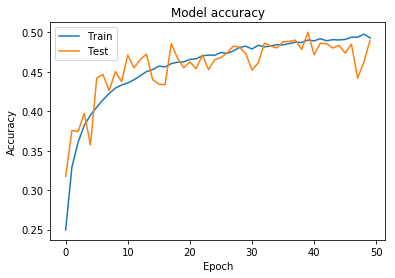

In [12]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

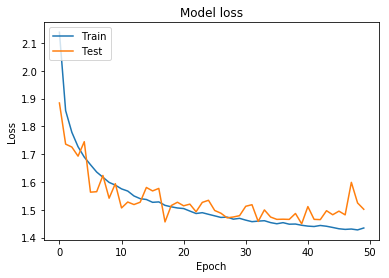

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()